# Логистическая регрессию 

- Говорили про обычную регрессию

In [1]:
import numpy as np
import matplotlib.pyplot as plt

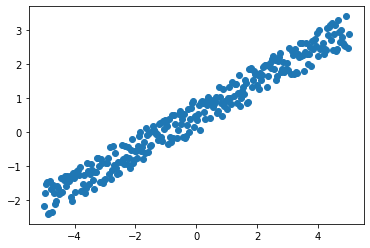

In [2]:
x = np.linspace(-5,5,300)
u = np.random.random(size=300)
y = 0.5*x + u
plt.scatter(x,y);

А теперь классификация

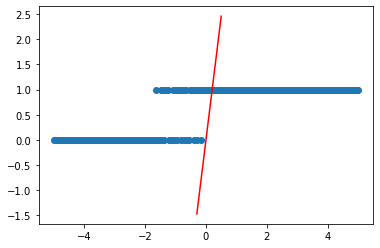

In [3]:
from sklearn.linear_model import LinearRegression

x = np.linspace(-5,5,300)
u = np.random.random(size=300)
y = 1*(0.5*x + u > 0)

model = LinearRegression()
model.fit(y.reshape(-1, 1),x.reshape(-1, 1))

xs = np.linspace(-0.3,0.5, 100)
plt.plot(xs, model.coef_[0][0]*xs, color='r')
plt.scatter(x,y);

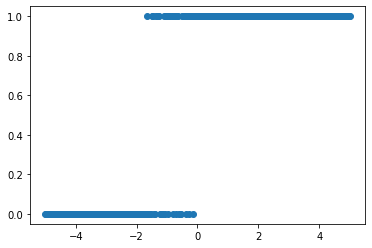

In [4]:
# Хочется провести сигмомиду (S-образные кривые)
plt.scatter(x,y);

### Задачулька 2.

Построй график функции $\Lambda(t) = \frac{\exp(t)}{1+\exp(t)}$.

По графику ответь на вопросы:

1. Монотонна ли функция?

1. Чему равны её пределы справа и слева?

1. Относительно какой точки симметричен график?

1. Какие значения принимает функция при произвольных $t$?

Подсказочка: Можно взять готовую функцию `expit`.

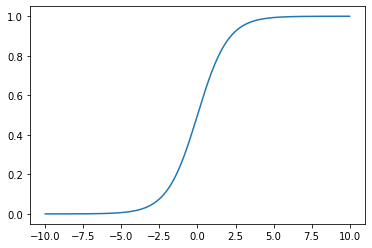

In [5]:
xs = np.linspace(-10,10,300)
y = np.exp(xs)/(1 + np.exp(xs))
plt.plot(xs,y);

In [6]:
x = np.linspace(-5,5,300)
u = np.random.random(size=300)
y = 1*(0.5*x + u > 0)

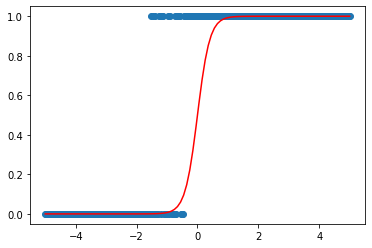

In [7]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(y.reshape(-1, 1),x.reshape(-1, 1))

sigm = lambda xs: np.exp(xs)/(1 + np.exp(xs))

xs = np.linspace(-5,5, 100)
plt.plot(xs, sigm( model.coef_[0][0]*xs ), color='r')
plt.scatter(x,y);

__Самое частое:__

- Функция распределения логистического распределения (легко интерпретировать) => Логистическая регрессия (логит)
- Функция распределения нормального распределения => пробит-модель

__Модель:__

- $x$ - регрессоры (объясняющие переменные)
- $y \in \{0,1\}$ - целевая переменная 



Склонность к тому, чтобы сделать действие $y=1$:

$$
y^* = \beta\cdot x
$$

$$
P(y=1) = \frac{e^{y^*}}{1 + e^{y^*}}
$$

In [8]:
beta = 0.5 # коэф из модели, мы его как-то по данным оценили

x = 10     # доход семьи 10 тыс долларов
_y = beta*x
sigm(_y)   # вероятность того, что y = 1

0.9933071490757152

Дальше мы выбираем по каким-то правилам порог.

In [9]:
tr = 0.5 
1*(sigm(_y) > 0.5)

1

__Интерпретация $\beta$__:

$$
\ln \frac{P(y=1)}{P(y = 0)} = \beta x
$$

$\beta = 0.5$ => при увеличии $x$ на единицу, логарифм шансов меняется на $\beta$ 

__Оценивание:__

Можно ли для оценивания модели использовать 

$$
MSE = \frac{1}{n} \sum_{i=1}^n (y_i -\hat{y_i})^2
$$

- Конечно же можно, но это не самый лучший вариант. Эта ошибка никак не завязана на вероятность => logloss

\begin{equation*}
\begin{aligned}
& y = 1 \qquad P( y = 1) \text{ высокая | хорошо} \\
& y = 0 \qquad P( y = 1) \text{ низкая | хорошо} \\
& y = 1 \qquad P( y = 1) \text{ низкая | плохо} \\
& y = 0 \qquad P( y = 1) \text{ высокая | плохо}
\end{aligned}
\end{equation*}

$$
p = P(y=1) = \frac{e^{\beta x}}{1 + e^{\beta x}}
$$

__Ошибка на 1 наблюдении:__

$$
-1 \cdot [p \cdot y  + (1 - p) \cdot (1 - y)] \to \min
$$

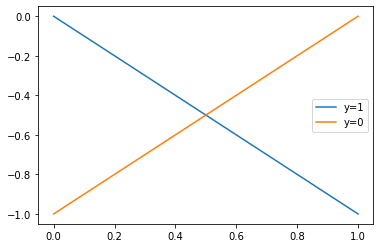

In [10]:
p = np.linspace(0,1,100)
plt.plot(p, -1*p, label='y=1')
plt.plot(p, -1*(1-p), label='y=0')
plt.legend();

Чтобы штраф был сильнее в местах, где мы меньше уверенны, добавим логарифмы: 

$$
-1 \cdot [\ln(p) \cdot y  + \ln(1 - p) \cdot (1 - y)] \to \min
$$

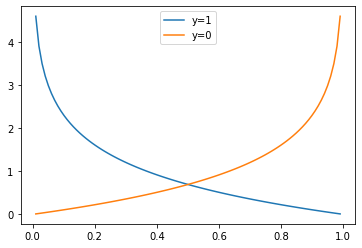

In [11]:
p = np.linspace(0,1,100)[1:-1]
plt.plot(p, -1*np.log(p), label='y=1')
plt.plot(p, -1*np.log(1-p), label='y=0')
plt.legend();

# Давайте что-нибудь спрогнозируем!

In [12]:
import pandas as pd
url = 'https://raw.githubusercontent.com/hse-econ-data-science/dap_2020_fall/master/sem12_13_logisticRegression/pokemon.csv'

In [13]:
df = pd.read_csv(url)
df.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [14]:
df.shape

(801, 41)

### Задачуленция 5.

![](https://upload.wikimedia.org/wikipedia/en/a/a6/Pok%C3%A9mon_Pikachu_art.png)

1. Загрузи данные по покемонам, `pokemon.csv`. Сколько всего наблюдений? Переменных?

2. Посмотри на описательные статистики. В каких пределах лежат `attack`, `defense` и `speed`?

3. Построй гистограммы силы атаки для легендарных и нелегандарных покемонов на одном графике. 

4. Построй аналогичные два графика для силы защиты и скорости. На каждом графике должны быть наложены две гистограммы: для легендарных и нелегендарных покемонов. 

5. Оцени параметры логистической регрессии:

$$P(legendary_i=1|attack_i, defense_i, speed_i)=\Lambda(\beta_1 + \beta_2 attack_i +\beta_3 defense_i +\beta_4 speed_i)$$

6. Оцени вероятность покемона с атакой 60, защитой 70 и скоростью 140 быть легендарным с помощью найденных тобой $\hat\beta_1$, $\hat\beta_2$, $\hat\beta_3$, $\hat\beta_4$.


In [15]:
df.columns

Index(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'classfication', 'defense', 'experience_growth', 'height_m', 'hp',
       'japanese_name', 'name', 'percentage_male', 'pokedex_number',
       'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg',
       'generation', 'is_legendary'],
      dtype='object')

In [16]:
sdf = df[['is_legendary', 'attack', 'defense', 'speed']]
sdf.describe()

,is_legendary,attack,defense,speed
count,801.000000,801.000000,801.000000,801.000000
mean,0.087391,77.857678,73.008739,66.334582
std,0.282583,32.158820,30.769159,28.907662
min,0.000000,5.000000,5.000000,5.000000
25%,0.000000,55.000000,50.000000,45.000000
50%,0.000000,75.000000,70.000000,65.000000
75%,0.000000,100.000000,90.000000,85.000000
max,1.000000,185.000000,230.000000,180.000000


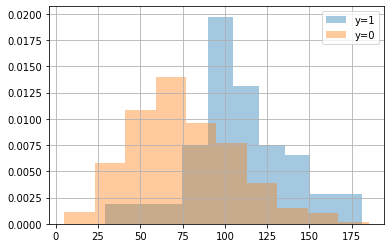

In [17]:
sdf[sdf.is_legendary == 1]['attack'].hist(bins=10,density=True, 
                                          alpha=0.4, label='y=1')
sdf[sdf.is_legendary == 0]['attack'].hist(bins=10,density=True, 
                                          alpha=0.4,label='y=0')
plt.legend();

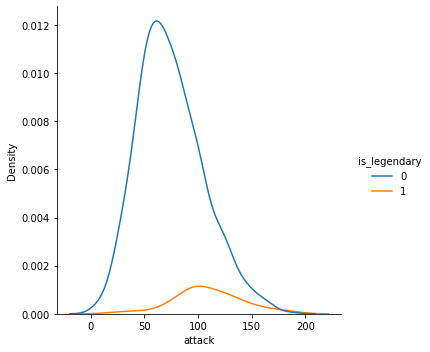

In [18]:
import seaborn as sns
sns.displot(data=sdf, x='attack', hue='is_legendary',
           alpha=0.4, kind='kde');

In [19]:
np.mean(y)

0.5933333333333334

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

y = sdf.is_legendary.values
X = sdf.drop("is_legendary", axis=1).values

# stratify следит, чтобы разбиение было одинаковым в плане пропорции единичек
Xtr, Xval, ytr, yval = train_test_split(X, y, test_size=0.2, stratify=y)

$$
-1 \cdot [\ln(p) \cdot y  + \ln(1 - p) \cdot (1 - y)] + \frac{1}{C} \cdot \sum \beta_k^2 \to \min
$$

In [21]:
model = LogisticRegression(C=1e+10)
model.fit(Xtr, ytr)
model.coef_

array([[0.01505017, 0.0318913 , 0.04245191]])

In [22]:
new_pok = pd.DataFrame({'attack': [60, 20], 'defense': [70, 50], 'speed': [140, 220]})
new_pok

,attack,defense,speed
0,60,70,140
1,20,50,220


In [23]:
# P(y=0), P(y=1)
model.predict_proba(new_pok)

array([[0.70270644, 0.29729356],
       [0.21482193, 0.78517807]])

Ну наверное по порогу $0.5$... 

In [108]:
model.predict(new_pok)

array([0, 1])

In [115]:
from sklearn.metrics import roc_auc_score

p_test = model.predict_proba(Xval)[:,-1]
roc_auc_score(yval, p_test)

0.9655004859086492

Ещё одна модель для сравнения... 

In [100]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(Xtr, ytr)

RandomForestClassifier()

# Метрики классификации

## Метрики, которые зависят от значения порога

Решение будем принимать по такому правилу: если $\hat{p} = P(y=1 | x) \ge t$, тогда прогнозируем $\hat y = 1$. Иначе $\hat y = 0$.

Какой порог выбрать? 

$t = 0.3,$
$t = 0.5,$
$t = 0.7$

In [24]:
p = np.array([0.8,0.6,0.5,0.7,0.1,0.3])
y = np.array([1,1,1,0,1,0])

$t = 0.3$

In [43]:
t = 0.3

y_hat = 1*(p >= t)

print(y_hat)
print(y)

[1 1 1 1 0 1]
[1 1 1 0 1 0]


__Accuracy__ - доля правильно данных ответов

In [44]:
np.mean(y == y_hat)

0.5

Эта метрика плоха тем, что она чувствительна к дисбалансу нулей и единичек. 

- $100$ больных
- $100000$ здоровых 

Если я скажу, что все здоровы, метрика __accuracy__ будет зашкаливать, хотя при этом больных искать я не научился :( 

In [45]:
from sklearn.metrics import accuracy_score
accuracy_score(y, y_hat)

0.5

In [46]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y, y_hat)

array([[0, 2],
       [1, 3]])

По столбцам отложены $\hat{y}$, а по строкам $y$

# Возвращение покемонов и PR-кривая 

Попробуем accuracy. А есть ли проблемы с димбалансом? 

In [55]:
np.mean(ytr)

0.0875

In [56]:
np.mean(yval)

0.08695652173913043

In [66]:
np.sum(yval)

14

In [63]:
p_hat = model.predict_proba(Xval)[:,-1]

t = 0.3
y_hat = p_hat >= t

In [64]:
accuracy_score(yval, y_hat)

0.906832298136646

In [69]:
# будем везед прогнозировать нули
y_hat_zero = np.zeros_like(yval)
accuracy_score(yval, y_hat_zero)

0.9130434782608695

Чёт не очень... 

In [70]:
confusion_matrix(yval, y_hat_zero)

array([[147,   0],
       [ 14,   0]])

In [71]:
confusion_matrix(yval, y_hat)

array([[141,   6],
       [  9,   5]])

pr = 5 / (6 + 5) точность это то как точно стреляет моя модель
rc = 5 / (5 + 9) как много того, что модель должна была найти, она нашла

In [91]:
p_hat = model.predict_proba(Xval)[:,-1]

t = 0.5
y_hat = p_hat >= t

In [92]:
confusion_matrix(yval, y_hat)

array([[146,   1],
       [ 12,   2]])

In [93]:
from sklearn.metrics import recall_score, precision_score
precision_score(yval, y_hat)

0.6666666666666666

In [94]:
recall_score(yval, y_hat)

0.14285714285714285

Коли мы можем менять порог и метрики пересчитываются, давайте попробуем его перебрать от 0 до 1 с каким-то шагом и построить картинку $(pr, rc)$

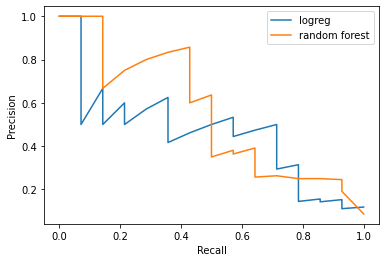

In [103]:
from sklearn.metrics import precision_recall_curve

# прогнозы из логистической регрессии
p_hat = model.predict_proba(Xval)[:,-1]

# прогнозы из случайного леса
q_hat = rf.predict_proba(Xval)[:,-1]

pr, rc, tr = precision_recall_curve(yval, p_hat)
plt.plot(rc, pr, label='logreg')

pr, rc, tr = precision_recall_curve(yval, q_hat)
plt.plot(rc, pr, label='random forest')

plt.xlabel('Recall')
plt.ylabel('Precision')

plt.legend();

Можно думать, что Recall и Precision - это какие-то товары, а PR-кривая это бюджетное ограничение. 

__Задание:__ как найти при ограничении recall >= 0.3 максимальный precision и порог? 

In [110]:
pr, rc, tr = precision_recall_curve(yval, q_hat)
np.max(pr[rc >= 0.3])

0.8571428571428571

In [113]:
c = np.where(pr == np.max(pr[rc >= 0.3]))
c

(array([27]),)

In [114]:
pr[c]

array([0.85714286])

In [115]:
rc[c]

array([0.42857143])

In [116]:
tr[c]

array([0.33])

Можно попытаться сделать какую-то усреднённую метрику: 

- Площадь под PR-кривой 

In [104]:
from sklearn.metrics import average_precision_score
average_precision_score(yval, p_hat)

0.47666902556360125

In [105]:
average_precision_score(yval, q_hat)

0.5531781422115851

- f-мера

$$
f_1 = \frac{2 \cdot pr \cdot rc}{pr + cd}
$$

In [118]:
from sklearn.metrics import f1_score
f1_score(yval, y_hat)

0.23529411764705882

# ROC-кривая

In [120]:
from sklearn.metrics import roc_auc_score
roc_auc_score(yval, p_hat)

0.8469387755102041

In [121]:
roc_auc_score(yval, q_hat)

0.870748299319728

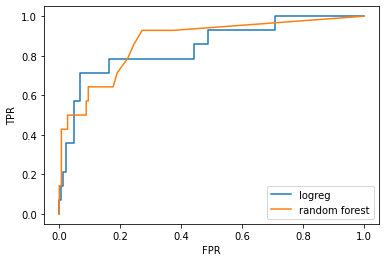

In [126]:
from sklearn.metrics import roc_curve
fpr, tpr, t = roc_curve(yval, p_hat)

plt.plot(fpr, tpr, label='logreg')

fpr, tpr, t = roc_curve(yval, q_hat)
plt.plot(fpr, tpr, label='random forest')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend();